<a href="https://colab.research.google.com/github/Beebruna/Treinamento_Data_Science/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install imgaug

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dropout, BatchNormalization
import cv2
import albumentations as da
from imgaug import augmenters as iaa
from sklearn.model_selection import train_test_split

In [2]:
cifar = keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

In [4]:
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


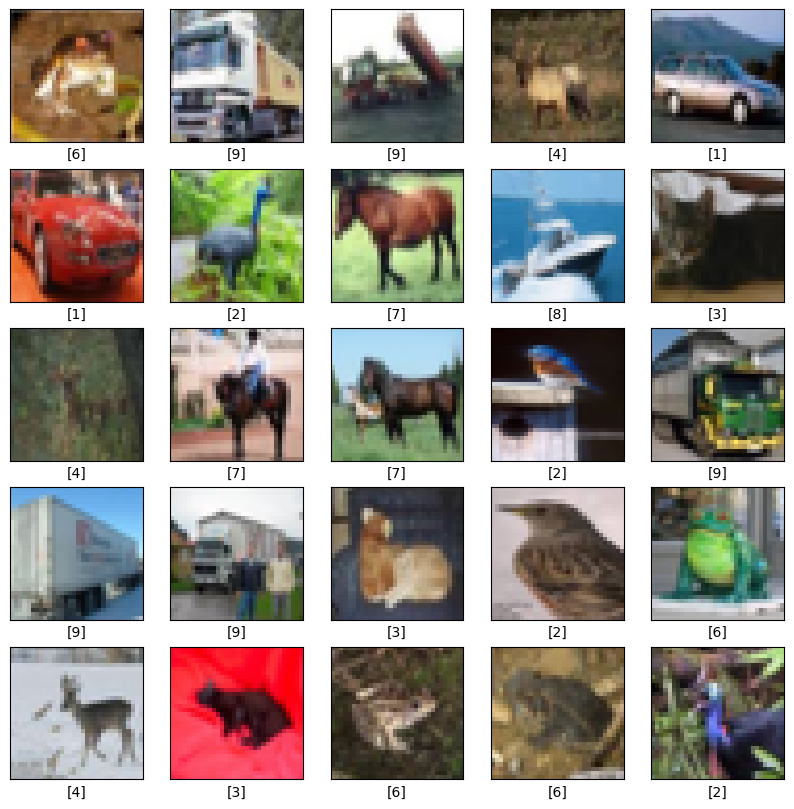

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i], cmap='binary')
    ax.set_xlabel(train_labels[i])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [5]:
train_images = train_images / 255
test_images = test_images / 255

In [6]:
def def_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
    model.add(BatchNormalization())

    model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
    model.add(BatchNormalization())

    model.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
    model.add(BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024, activation='relu'))
    model.add(Dropout(0.33))

    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
model = def_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                      

In [ ]:
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 19s 6ms/step - loss: 1.5298 - accuracy: 0.4851 - val_loss: 1.9040 - val_accuracy: 0.3789
Epoch 2/25
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0737 - accuracy: 0.6335 - val_loss: 1.1480 - val_accuracy: 0.6020
Epoch 3/25
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9075 - accuracy: 0.6896 - val_loss: 0.9618 - val_accuracy: 0.6778
Epoch 4/25
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7677 - accuracy: 0.7411 - val_loss: 1.1366 - val_accuracy: 0.6155
Epoch 5/25
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6470 - accuracy: 0.7816 - val_loss: 1.1989 - val_accuracy: 0.6093
Epoch 6/25
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5435 - accuracy: 0.8148 - val_loss: 0.8658 - val_accuracy: 0.7418
Epoch 7/25
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4543 - accuracy: 0.8446 - val_loss: 0.8711 - val_accuracy

In [7]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='lower left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()

In [8]:
def print_eval(test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(test_loss)
    print(test_acc)

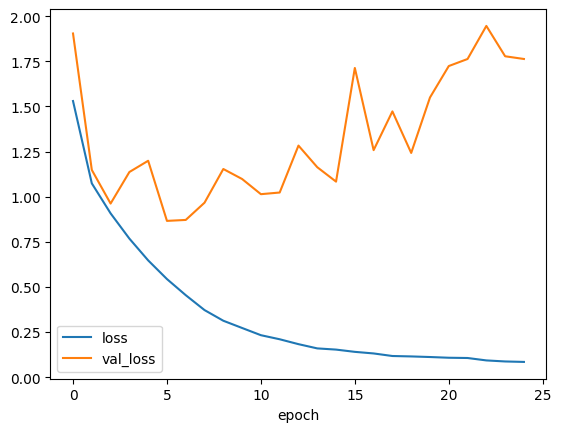

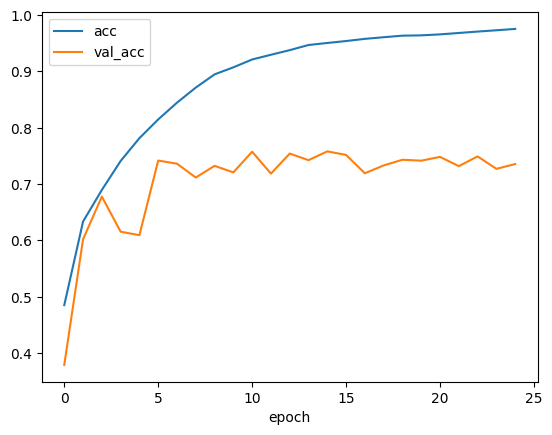

313/313 [==============================] - 1s 4ms/step - loss: 1.8659 - accuracy: 0.7224
1.8659144639968872
0.7224000096321106


In [ ]:
plot_history(history)
print_eval(test_images, test_labels)

In [ ]:
model = def_model()
meus_callbacks = [
    keras.callbacks.EarlyStopping(patience=3), # Monitora a loss function
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.h5') # persiste o modelo
]

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2, callbacks=meus_callbacks)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                      

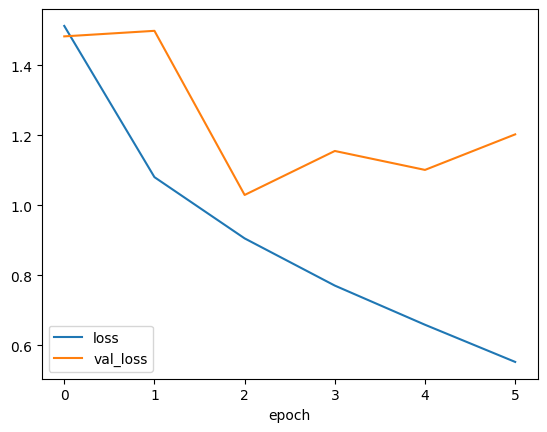

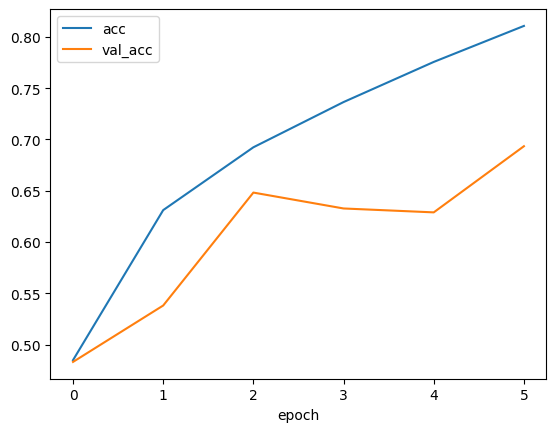

313/313 [==============================] - 1s 4ms/step - loss: 1.2235 - accuracy: 0.6918
1.2235357761383057
0.6917999982833862


In [ ]:
plot_history(history)
print_eval(test_images, test_labels)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
model = def_model()
meus_callbacks = [
    keras.callbacks.LearningRateScheduler(scheduler), # Monitora a loss function
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.h5') # persiste o modelo
]

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2, callbacks=meus_callbacks)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                      

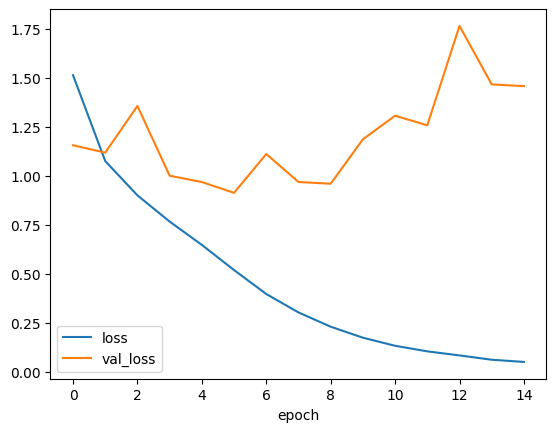

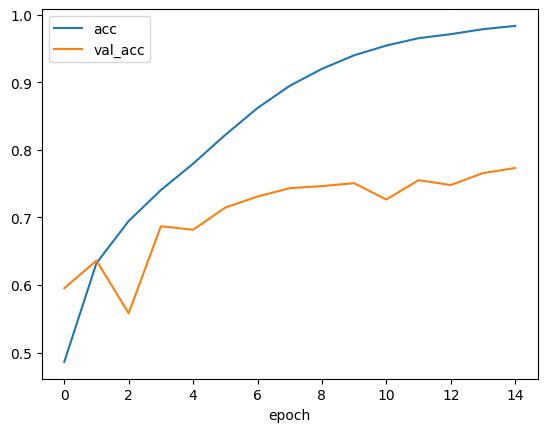

313/313 [==============================] - 1s 4ms/step - loss: 1.4503 - accuracy: 0.7668
1.450268268585205
0.7667999863624573


In [ ]:
plot_history(history)
print_eval(test_images, test_labels)

In [11]:
model = def_model()
meus_callbacks = [
    keras.callbacks.EarlyStopping(patience=6),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001),
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.h5') # persiste o modelo
]

tf.random.set_seed(42)

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2, callbacks=meus_callbacks)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                      

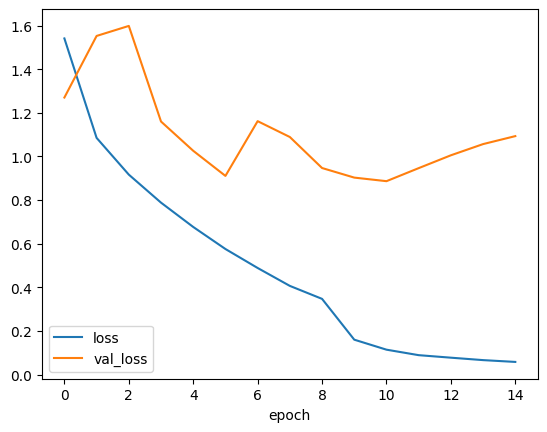

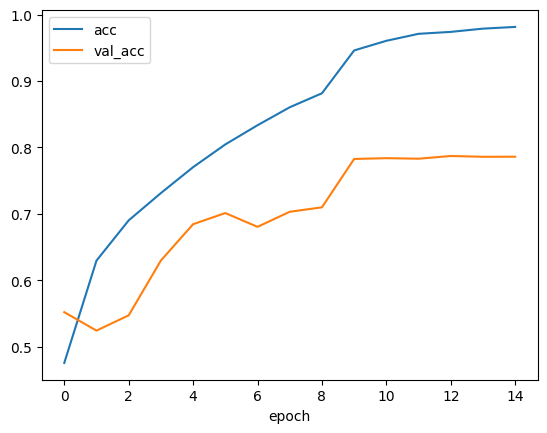

313/313 [==============================] - 1s 3ms/step - loss: 1.1515 - accuracy: 0.7825
1.1515302658081055
0.7825000286102295


In [12]:
plot_history(history)
print_eval(test_images, test_labels)

In [9]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

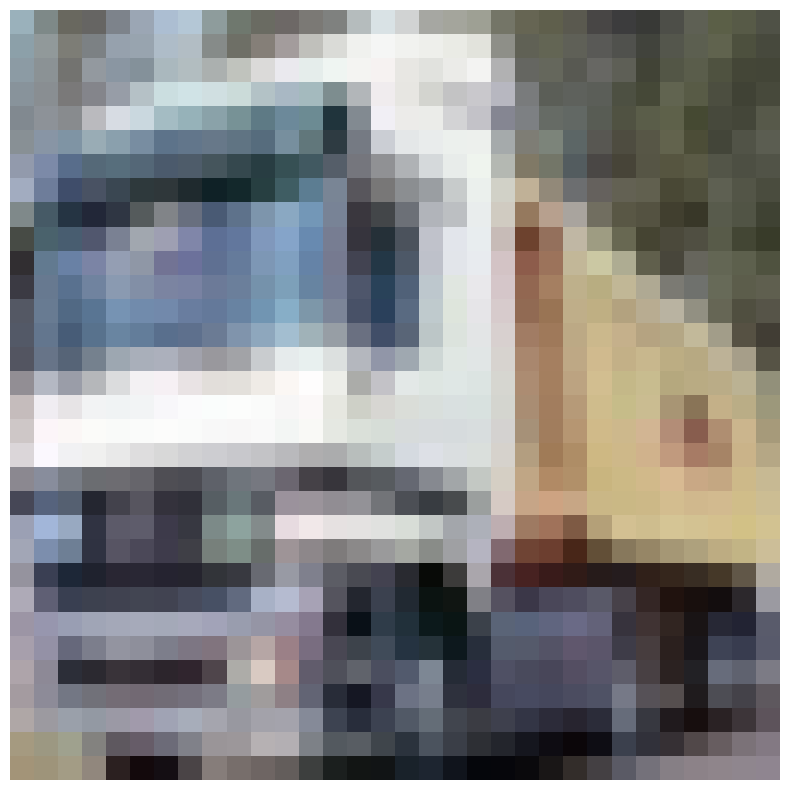

In [15]:
visualize(train_images[1])

In [20]:
image = cv2.imread('/content/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

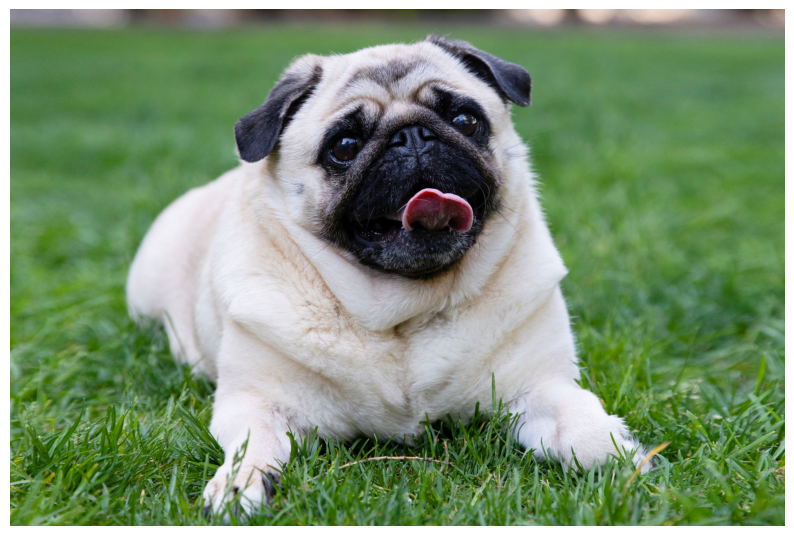

In [24]:
visualize(image)

In [18]:
transform = da.Compose([
    da.CLAHE(),
    da.RandomRotate90(),
    da.Transpose(),
    da.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    da.Blur(blur_limit=3),
    da.OpticalDistortion(),
    da.GridDistortion(),
    da.HueSaturationValue()
])

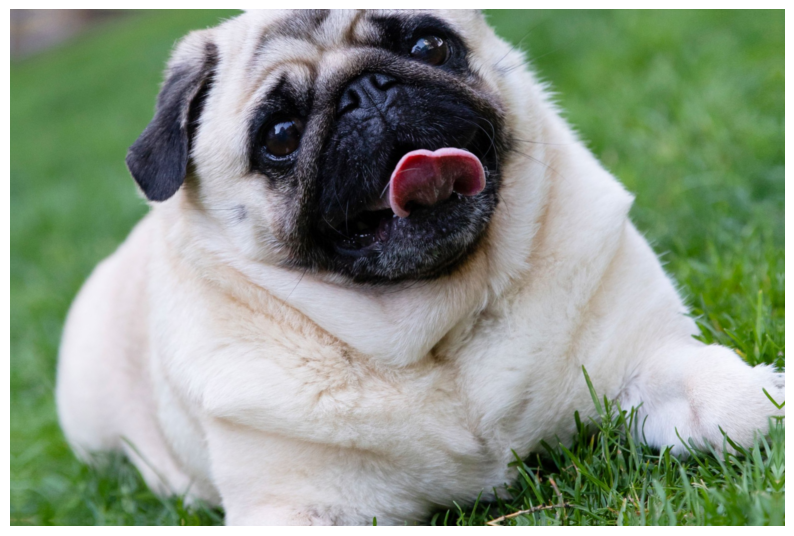

In [32]:
augmented_image = transform(image=image)['image']
visualize(augmented_image)

In [10]:
seq = iaa.Sequential([
    iaa.Fliplr(0.2), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5
    # But we only blur about 50% of all images
    iaa.Sometimes(
        0.1,
        iaa.GaussianBlur(sigma=(0, 0.25))
    ),
    # Apply affine transformation to each image
    # Scale/zoom them, translate/move them, rotate them and shear them,
    iaa.Affine(
        scale={'x': (0.4, 0.6), 'y': (0.4, 0.6)},
        rotate=(-10, 10),
        shear=(-4, 4)
    )
], random_order=True) # apply augmenters in random order

In [18]:
images_aug = seq.augment_images(train_images)

In [19]:
images_aug.shape

(50000, 32, 32, 3)

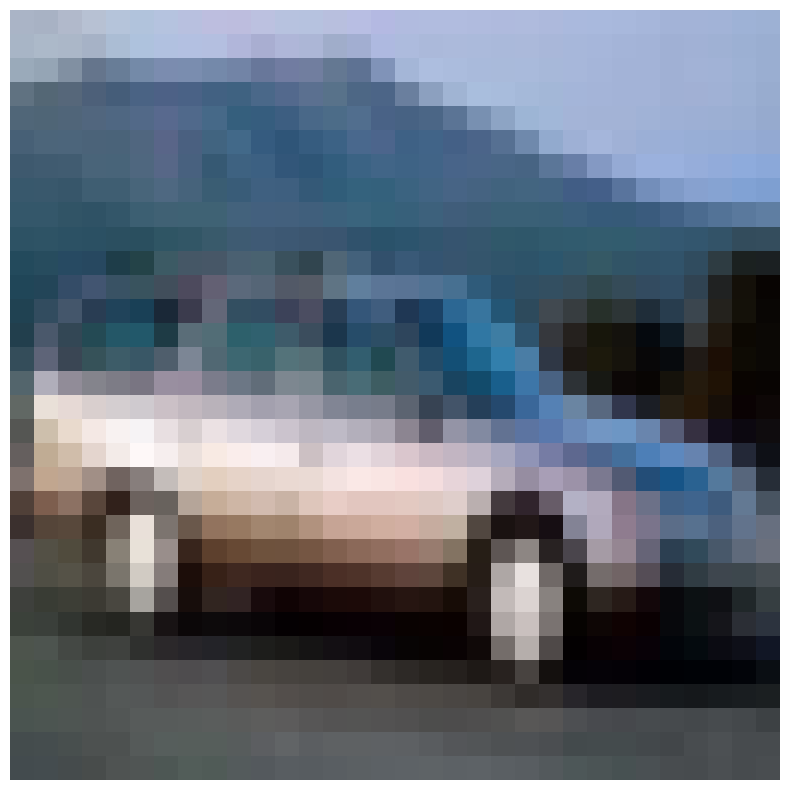

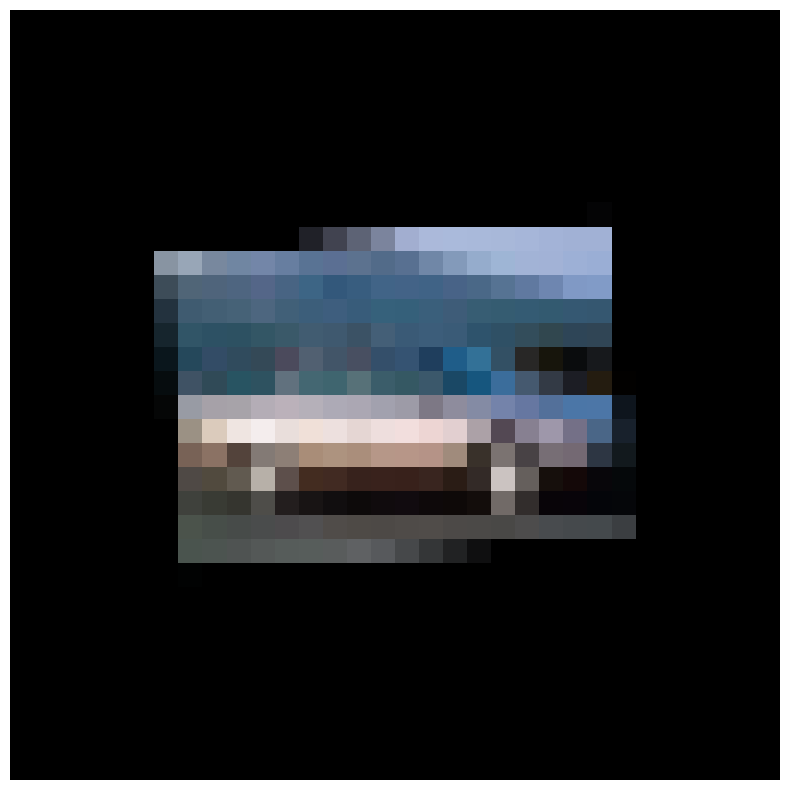

In [21]:
visualize(train_images[4])
visualize(images_aug[4])

In [11]:
train_images, X_val, train_labels, y_val = train_test_split(
    train_images, train_labels, test_size=0.2
)

In [ ]:
del images_aug

In [12]:
for i in range(2):
    train_images = np.vstack((train_images, seq.augment_images(train_images[:40000])))
    train_labels = np.vstack((train_labels, train_labels[:40000]))

In [13]:
print(train_images.shape)
print(train_labels.shape)

(120000, 32, 32, 3)
(120000, 1)


In [14]:
model = def_model()
meus_callbacks = [
    keras.callbacks.EarlyStopping(patience=6),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001),
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.h5') # persiste o modelo
]

tf.random.set_seed(42)

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2, callbacks=meus_callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                        

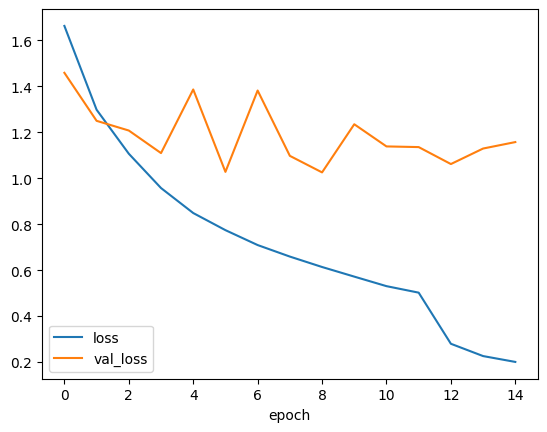

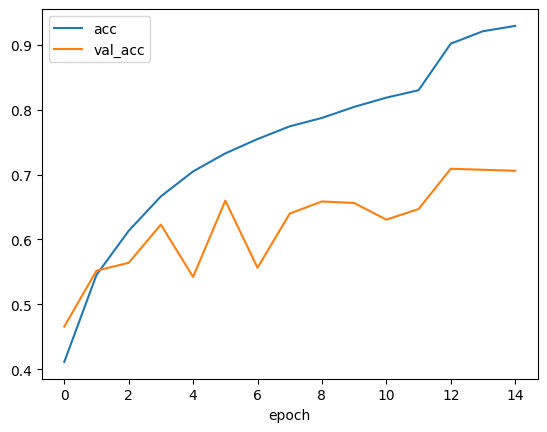

313/313 [==============================] - 1s 4ms/step - loss: 1.1647 - accuracy: 0.7906
1.1646748781204224
0.7906000018119812


In [15]:
plot_history(history)
print_eval(test_images, test_labels)